In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
X, y = load_iris(return_X_y=True, as_frame=True)

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


The .sample(n) method in Pandas is used to randomly select a subset of rows from a DataFrame or Series.

In [5]:
y.sample(10)

,target
46,0
101,2
21,0
22,0
140,2
68,1
85,1
3,0
119,2
19,0


In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=7)
X_train.shape, X_valid.shape

((100, 4), (50, 4))

In [7]:
model = DecisionTreeClassifier() # criterion="gini" default
model2 = DecisionTreeClassifier(criterion="entropy")

model.fit(X_train, y_train)
model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [8]:
y_pred = model.predict(X_valid)

In [9]:
y_pred2 = model2.predict(X_valid)

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid, y_pred)
accuracy

0.94

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid, y_pred2)
accuracy

0.88

In [15]:
model.score(X_valid, y_valid)

0.94

In [16]:
model2.score(X_valid, y_valid)

0.88

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt


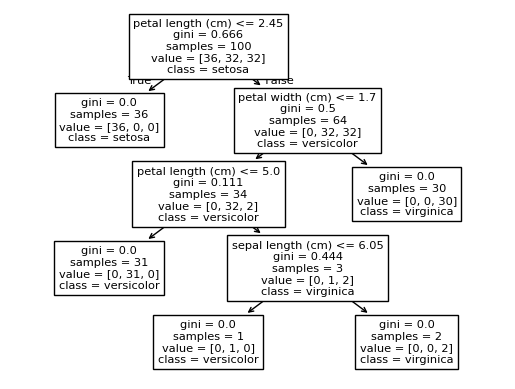

In [21]:
plot_tree(model, feature_names=X.columns, class_names=['setosa','versicolor','virginica'])
plt.show()

max_depth = 2, then it gets truncated

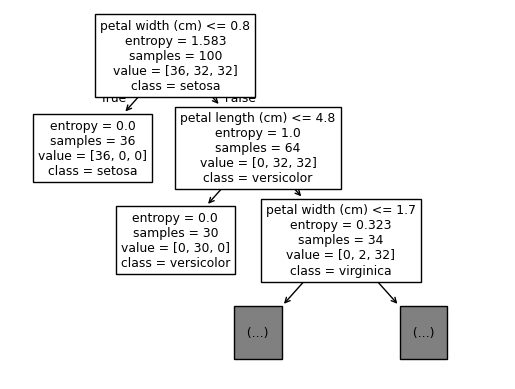

In [24]:
plot_tree(model2, max_depth=2, feature_names=X.columns, class_names=['setosa','versicolor','virginica'])
plt.show()

In [25]:
print(export_text(model))

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.70
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.70
|   |   |--- class: 2

